**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [2]:
fdiry = file.path(FD_WRK, "annotation_fragment")
motif = "NR_20"
fname = "target_PER1.bed"
fglob = file.path(fdiry, "*", motif, fname)
Sys.glob(fglob)

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input/NR_20/target_PER1.bed"    
 [2] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/NR_20/target_PER1.bed"   
 [3] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/NR_20/target_PER1.bed"   
 [4] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/NR_20/target_PER1.bed"   
 [5] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/NR_20/target_PER1.bed"   
 [6] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/NR_20/target_PER1.bed"   
 [7] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_DMSO/NR_20/target_PER1.bed"
 [8] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/NR_20/target_PER1.bed" 
 [9] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_DMSO/NR_20/target_PER1.bed"
[10] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/NR_20/target_PER1.bed" 
[11] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/NR_20/target_PER1.bed"
[12] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/NR_20/target_PER1.bed" 
[13] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/NR_20/target_PER1.bed"
[14] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/NR_20/target_PER1.bed" 
[15] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_DMSO/NR_20/target_PER1.bed" 
[16] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_Dex/NR_20/target_PER1.bed"

## Import

In [9]:
get_sample = function(idn_sample){
    idn = idn_sample
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

In [10]:
fdiry = file.path(FD_WRK, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

ctypes = c(col_integer(), col_character())
cnames = c("Size", "Fpath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)
dat_lib = dat_lib %>% 
    mutate(Sample = tools::file_path_sans_ext(basename(Fpath))) %>%
    mutate(Group = get_sample(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
head(dat_lib, 10)

Size,Sample,Group
18666630,Input1,Input
20167924,Input2,Input
23280988,Input3,Input
19003938,Input4,Input
15325016,Input5,Input
48376253,TFX2_AZD2906,TFX_AZD2906
52542517,TFX2_AZD9567,TFX_AZD9567
43646484,TFX2_CORT108297,TFX_CORT108297
41732268,TFX2_CpdA,TFX_CpdA
43844606,TFX2_DMSO,TFX_DMSO


## Import

In [11]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
cnames = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")
Samples=c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [12]:
print(str_remove(string = Samples, pattern = "[0-9]"))

 [1] "Input"    "Input"    "Input"    "Input"    "Input"    "TFX_DMSO"
 [7] "TFX_DMSO" "TFX_DMSO" "TFX_DMSO" "TFX_Dex"  "TFX_Dex"  "TFX_Dex" 
[13] "TFX_Dex" 


In [13]:
fdiry = file.path(FD_WRK, "annotation_fragment")
motif = "NR_20"
fname = "target_PER1.bed"
fglob = file.path(fdiry, "*", motif, fname)

lst_NR20_PER1 = lapply(Samples, function(sam){
    ### get file
    fglob = file.path(fdiry, sam, motif, fname)
    fpath = Sys.glob(fglob)
    print(fpath)
    
    ### import data
    dat = read_tsv(fpath, col_types=ctypes, col_names=cnames)
    dat$Sample = sam
    return(dat)
})

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_DMSO/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_DMSO/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/NR_20/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/NR_20/target_PER1.bed"
[1] "/work/kk319

In [21]:
lst = lst_NR20_PER1
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()
    return(dat)
})

dat = bind_rows(lst)
dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
dat = dat %>% left_join(dat_lib, by="Sample")
dat = dat %>% 
    mutate(Norm_Value    = Value / Size) %>% 
    mutate(Lognorm_Value = log10(Value) - log10(Size))
#dat = dat %>% mutate(Group = str_remove(string = Sample, pattern = "[0-9]"))
dat

Sample,Value,Size,Group,Norm_Value,Lognorm_Value
Input1,73,18666630,Input,3.910722e-06,-5.407743
Input2,79,20167924,Input,3.917111e-06,-5.407034
Input3,123,23280988,Input,5.283281e-06,-5.277096
Input4,82,19003938,Input,4.314895e-06,-5.365030
Input5,56,15325016,Input,3.654156e-06,-5.437213
TFX2_Dex,2128,45413539,TFX_Dex,4.685827e-05,-4.329214
TFX2_DMSO,441,43844606,TFX_DMSO,1.005825e-05,-4.997478
TFX3_Dex,1382,26400671,TFX_Dex,5.234715e-05,-4.281107
TFX3_DMSO,330,26819569,TFX_DMSO,1.230445e-05,-4.909938
TFX4_Dex,1813,34590086,TFX_Dex,5.241386e-05,-4.280554


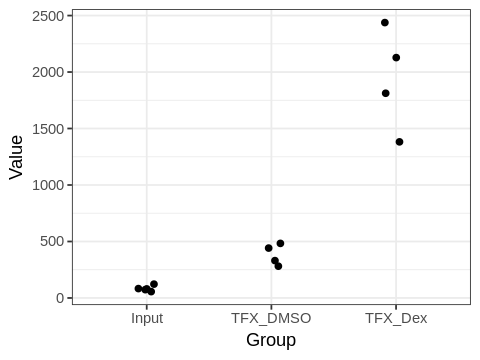

In [22]:
options(repr.plot.height=3, repr.plot.width=4)
set.seed(123)

dat$Group = factor(dat$Group, levels=c("Input", "TFX_DMSO", "TFX_Dex"))
ggplot(dat, aes(x=Group, y=Value)) + geom_jitter(width=0.1) + theme_bw()

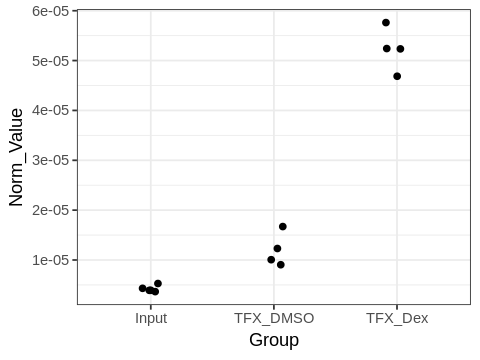

In [23]:
options(repr.plot.height=3, repr.plot.width=4)
set.seed(123)

dat$Group = factor(dat$Group, levels=c("Input", "TFX_DMSO", "TFX_Dex"))
ggplot(dat, aes(x=Group, y=Norm_Value)) + geom_jitter(width=0.1) + theme_bw()

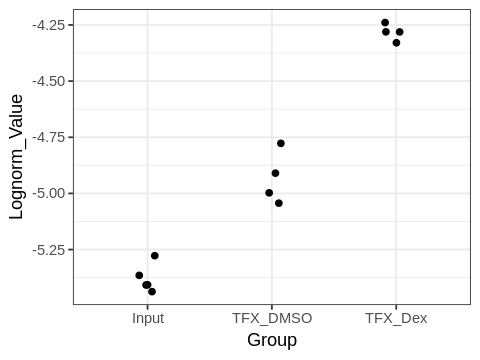

In [24]:
options(repr.plot.height=3, repr.plot.width=4)
set.seed(123)

dat$Group = factor(dat$Group, levels=c("Input", "TFX_DMSO", "TFX_Dex"))
ggplot(dat, aes(x=Group, y=Lognorm_Value)) + geom_jitter(width=0.1) + theme_bw()

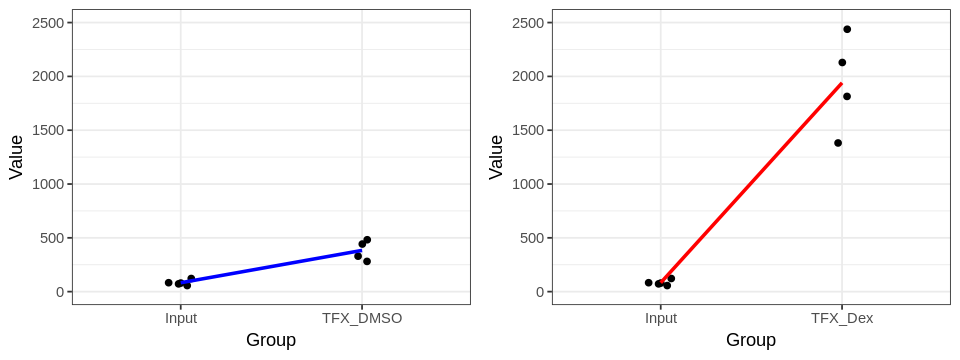

In [25]:
set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_Dex")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_DMSO"))
gp1 = ggplot(tmp, aes(x=Group, y=Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    ylim(0, 2500) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Value),
        method = lm, se = FALSE, color="blue")

set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_DMSO")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_Dex"))
gp2 = ggplot(tmp, aes(x=Group, y=Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    ylim(0, 2500) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Value),
        method = lm, se = FALSE, color="red")

options(repr.plot.height=3, repr.plot.width=8)
grid.arrange(gp1, gp2, ncol=2)

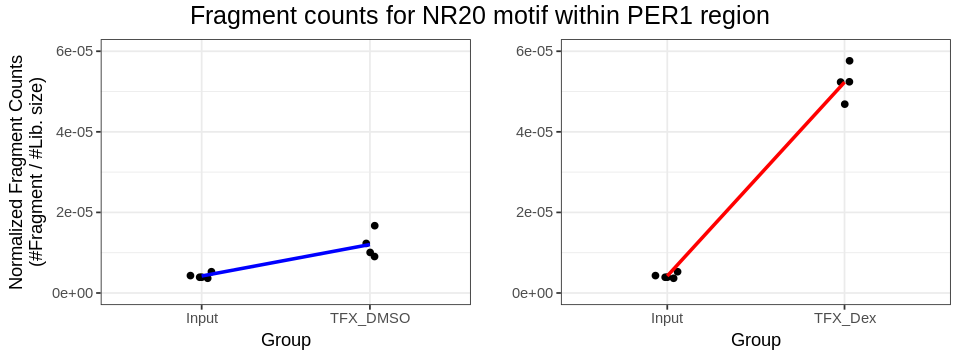

In [55]:
set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_Dex")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_DMSO"))
gp1 = ggplot(tmp, aes(x=Group, y=Norm_Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    labs(y="Normalized Fragment Counts\n(#Fragment / #Lib. size)") +
    ylim(0, 6*1e-5) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Norm_Value),
        method = lm, se = FALSE, color="blue")

set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_DMSO")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_Dex"))
gp2 = ggplot(tmp, aes(x=Group, y=Norm_Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    labs(y="") +
    ylim(0, 6*1e-5) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Norm_Value),
        method = lm, se = FALSE, color="red")

options(repr.plot.height=3, repr.plot.width=8)
grid.arrange(
    gp1, gp2, ncol=2,
    top=textGrob(
        "Fragment counts for NR20 motif within PER1 region",
        gp=gpar(fontsize=15,font=1)
    )
)

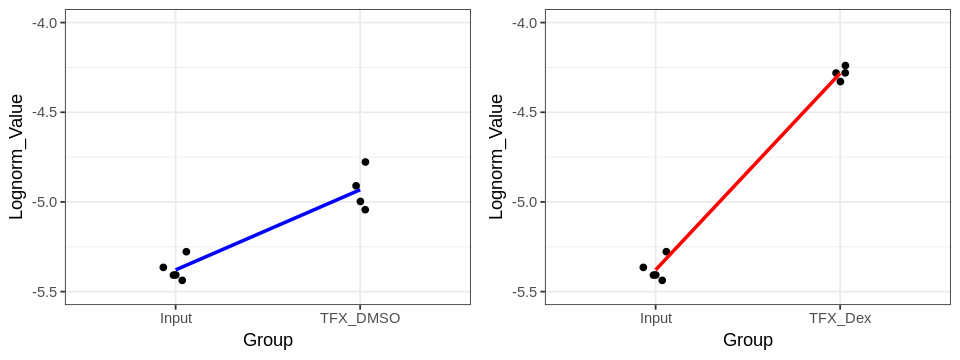

In [42]:
set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_Dex")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_DMSO"))
gp1 = ggplot(tmp, aes(x=Group, y=Lognorm_Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    ylim(-5.5, -4) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Lognorm_Value),
        method = lm, se = FALSE, color="blue")

set.seed(123)
tmp = dat %>% dplyr::filter(Group != "TFX_DMSO")
tmp$Group = factor(tmp$Group, levels=c("Input", "TFX_Dex"))
gp2 = ggplot(tmp, aes(x=Group, y=Lognorm_Value)) + 
    geom_jitter(width=0.1) + 
    theme_bw() + 
    ylim(-5.5, -4) +
    geom_smooth(
        aes(x=as.numeric(Group), y=Lognorm_Value),
        method = lm, se = FALSE, color="red")

options(repr.plot.height=3, repr.plot.width=8)
grid.arrange(gp1, gp2, ncol=2)

In [32]:
X = model.matrix(~ Group, dat)
X[,"GroupTFX_DMSO"] = X[,"GroupTFX_DMSO"] + X[,"GroupTFX_Dex"]
X

(Intercept),GroupTFX_DMSO,GroupTFX_Dex
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,1,1
1,1,0
1,1,1
1,1,0
1,1,1


In [33]:
y1 = dat$Value
y2 = dat$Norm_Value
y3 = dat$Lognorm_Value

In [35]:
fit = lm(y1 ~ X + 0)
res = summary(fit)
print(res)


Call:
lm(formula = y1 ~ X + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-558.25  -53.25   -3.60   57.75  497.75 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
X(Intercept)       82.6      113.1   0.730    0.482    
XGroupTFX_DMSO    300.6      169.7   1.772    0.107    
XGroupTFX_Dex    1557.0      178.9   8.705 5.58e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 253 on 10 degrees of freedom
Multiple R-squared:  0.9608,	Adjusted R-squared:  0.949 
F-statistic: 81.68 on 3 and 10 DF,  p-value: 2.467e-07



In [36]:
fit = lm(y2 ~ X + 0)
res = summary(fit)
print(res)


Call:
lm(formula = y2 ~ X + 0)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.452e-06 -5.619e-07  3.680e-08  2.767e-07  5.312e-06 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
X(Intercept)   4.216e-06  1.373e-06   3.070  0.01184 *  
XGroupTFX_DMSO 7.812e-06  2.060e-06   3.792  0.00353 ** 
XGroupTFX_Dex  4.028e-05  2.171e-06  18.553 4.47e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.071e-06 on 10 degrees of freedom
Multiple R-squared:  0.9919,	Adjusted R-squared:  0.9895 
F-statistic: 410.5 on 3 and 10 DF,  p-value: 9.142e-11



In [37]:
fit = lm(y3 ~ X + 0)
res = summary(fit)
print(res)


Call:
lm(formula = y3 ~ X + 0)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.111480 -0.046642  0.001465  0.022106  0.154808 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
X(Intercept)   -5.37882    0.03487 -154.263  < 2e-16 ***
XGroupTFX_DMSO  0.44678    0.05230    8.542 6.60e-06 ***
XGroupTFX_Dex   0.64947    0.05513   11.781 3.47e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07797 on 10 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 1.729e+04 on 3 and 10 DF,  p-value: < 2.2e-16

